# Week X - Basics of Machine Learning (ML)

## Preliminaries: Good Books for this course

There are 3 books that I would recommend. The books are:

1) [The one hundred-page Machine Learning book](http://themlbook.com/) by 
Andriy Burkov. This is the best conceptual book on ML that I have read. It also does a reasonable jobs of the maths. This book is free to try before you buy (a great idea).

**then two O'REILLY books:**

2) [Hands on machine learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) by Aurélien Géron. This is the best hands on book that I have read and has sufficient detail to take you into the understanding of the algorithms. This book also has a good collection of the original papers cited and links to them on their website. There is also much information on the [github](https://homl.info). If you only buy one then this one covers the most. **If there was a textbook for this course, this would be it.**

3) [Introduction to Machine Learning with python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/). This is a more introductory level than one above, however it is really well written and takes you through things more carefully and I find is very good. I tend to use the two as complementary.

There are plenty of other good more theoretical ML books but the above are practical, but still having enough theory for you to understand them. In this course we only have time to teach you the basics and to touch on a few techniques. These books will take you further.

**Note:** I will take examples from the last two of these books (on publically available data) and will reference them appropriately. For 2) I will write {homl} and for 1) I will write {imlp}.


# Section One: Types of Machine Learning

In machine learning you build a model from the data that you have. There are many different sorts of machine learning and there are many different ways of categorising them.

### Supervised, Unsupervised and Reinforcement Learning

Most of the machine learning that we carry out in the physical sciences (and in the world at large) is **supervised learning**. This is were you build a model using data with a **known output**. The historical data is then used as way of trainint the model. **Unsupervised learning** is where you **don't have a known output** and you are trying to build a model based on other properties for example by clustering the data. You can also get semisupervised learning which is somehwere between the two where you have algorithms that cope with partially labelled data.

**Reinforcemnt learning** is somewhat different in that it has agents that **perform a (sometimes complex) series of tasks** and learn to do the tasks well through a series of **trial and error**. If you have ever played a game against a ML based computer then is almost certainly how it was trained.

### Classification and Regression

The two main uses of ML in the physical sciences are classification and regression in supervised ML. In **classification** you are trying to **distinguish between different sorts entity** (say pictures of cats from dogs or the energy deposits left by electron versus muons in a detector) whereas in **regression** you are trying to predict **what a value will be** (say the return on an investment, or energy of a cosmic ray based on observation of scintillation light and the muons that it produced). Simply, classification tells you what it is whereas regression tells you what value it has.

While these sound conceptually different the same approaches can often be used for both as you will.

### Instance-based and Model-based Learning

The purpose of ML is to be able to take the data that you have and generalise it to new data. In **instance-based learning** you simply look at the data that you have and in some way say that it is (either in classification or regression) **the same as the "nearest" (calculated in some way) data that you already have** to it. 

In **model-based learning** you take a few instances and build a **more general model**. This model is **refined** through **training and validation**. Model-based ML models often have **internal parameters that are not seen in the outside world -- these are called hyperparameters**.



# Section Two: Challenges in ML

This part is a paraphrase of what is said the same section of {homl}, I even pinch their example. They say it much more eloquently but mine is more succinct.

### Insuficient Training Data

Without the training data there is not much that you can do in the way of MLO. Often data sets of thousands of events are required to build a reasonable model. There are sometimes things you can do to lower the amount of data you need, for example by making your datasets as simple as possible -- but basically not enough data poor ML.

### Unrepresentative (Biased) Training Data

If there is a systematic bias in your training data then your model will not generalise well and will produce wrong results. Some form of regularisation can be used to mitigate this to some extent (see later).

### Poor quality data

If your data are noisy with lots of errors and outliers then your model is not going to be reliable. 

You may have missing fields (one of your instruments wasn't working that day) at which point you need to decide what to do about the missing data. There are a variety of approaches but two common ones are to set it to the median value so that it should have very little influence or to do the opposite and to set it to a value outside the normal range so that the model "learns" not to use it. There are pros and cons to both.

### Irrelevant features

If your data contains lots of data that is irrelevant it can sometimes swamp the model and mean that the data containing the relevant information is lost. An important part of ML is coming up with an appropriate and good set of features. This is sometimes called feature engineering. This can involve selecting only the most important data features  or combining features into more appropriate new features. For example if you have a feature that is a function of $r$, where $r=\sqrt{x^2+y^2}$ it is better to use $r$ than $x$ and $y$ separately.

### Overfitting the training data

We came across something similar with minuit. 

This is generally when your model is more complex than the data you have can easily train. An example taken straight from {homl} is the figure below:
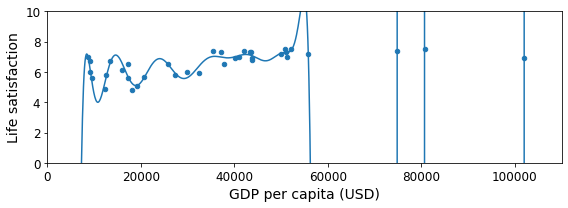

In generalyou should keep your model as simple as possible to fit the data well.

### Underfitting

As you can guess this is the opposite of overfitting and is when your model is too simple to fit the data that you have. For example if you are trying to fit your data with a linear model but really the data form a parabolic distribution.

## Testing and Validating

The only way to know if your model has generalised well is to validate it on data. The most normal way to do that is to separate your data into training data and testing data. You use the training data to train your model and the testing data to test how well it has generalised. If there is a great difference in the performance  of the model on the training data compared to the performance on the testing data it shows that your model has been overtrained and is picking out features that are specific to your training data. 

*What fraction of your data should you use to train and what fraction to test?* There is no single answer to this question, but in most cases it tupically around 70:30 or 80:20 training:testing.  

# Section Three: Simple Regression Algorithms

Remeber that regression is trying to predict the value of some quantity by looking at a data set of similar data. Note that this is different from the fitting that your were performing with iminuit last week. There you had an implicit assumption that there is an underlying truth that the data would follow in the absence of noise and statistical effects, here all that is assumed is that these data vary in a similar way. 

Lets set up a data set

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import pylab as pl

x = 2 * np.random.rand(120, 1)
y = 4 + 3 * x + np.random.randn(120, 1)
z = x*x+y*np.random.randn(120,2)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) # note that sklearn can split your data into samples for you.




pl.plot(x_train,y_train,"*")
pl.plot(x_test,y_test,"o")
pl.show()

# looks a reasonable mix

Now set up a really simple regression algorithm and see what it would predict -- with different algorithm parameters. We will start off off with a k nearest neighbours regression algorithm. Look up the algorithm online it is used a lot more than you might think in the real world so it worth understanding it.

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 

# pick values for k nearest neighbors and weighting.
k=18 # number of NN taken into acount

#weights="distance" # how are the weighted
weights="uniform"
weight="distance"
model=neighbors.KNeighborsRegressor(n_neighbors=k,weights=weights)
model.fit(x_train,y_train)


# first lets see what line would predict from the training data 
xl=np.linspace(0,2,1000).reshape(-1,1)
pl.plot(x_train,y_train,"*")
pl.plot(x_test,y_test,"o")
pl.plot(xl,model.predict(xl))

# calculate the rms error for testing data
pred=model.predict(x_test) #make prediction on test set
error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse

print("the error is",error)
pl.show()


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x_train, y_train, cv=3) # so this has 3 folds

## Exercise (short)

KNN is very useful if you just want a general parametisation and are not making assumptions about the linearity or otherwise of the fit.

Turn the program above into a loop and investigate how well this algorithm does as a function of NN and weighting. Try changing the number of points may be from 120 to 1200 and see how things change.

## Linear models

Now, the the simple least squares linear model can be solved analytically as it is of closed form. {homl} will show you how to do that, however here we will just treat like another algorithm. Also this is nolonger the case when the number of entry points becomes very large as it becomes too computationally intensive. The different gradient decent methods are needed.

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_)

In [ ]:
pl.plot(x_train,y_train,"*")
pl.plot(xl,lin_reg.predict(xl))
pred=lin_reg.predict(x_test) #make prediction on test set
error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse

print("the error is",error)
pl.show()

## Polynomial regression

This is an example taken straight from {homl} however, like so much in that book I think that it is clearly explained (although my explanation is shorter).

In [ ]:
#generate some data
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

Now in reality I would probably not try to perform linear regression on this but would use another form of regression. Remember we are only trying to predict the values **NOT** trying to fit for an underlying physical model. However, this does provide some useful clues as to how to do things and so I am keeping this here.

The first thing that you will notice is that what is done is to use sklearn.preprocessing to add additional features. In this case the squares of the of the numbers. The preprocessing functions in sklearn are really useful and powerful. Sadly we don't have time to go through them here but you should know that they exist. The description for this one can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) do take some time to look through them and familiarise your self with them.

With this extra feature you can perform linear regression on the expanded data set.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X_poly[1],X[1])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_) # note that coeff now has 2 components as it is now a plane

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

so what happens if you add more polynomial features?


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

**The code below shows how you can tell that there is overfitting going on - I will discuss these with you when we get to this stage.**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book

plt.show()                                      # not shown

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown

plt.show()                        # not shown

## Regularisation

In regularised regression you apply a cost function that stops your overfitting going out of control (or at least helps to constrain it). We don't have time to cover this in detail but you should be familiar  with the names so that you know what to look up if you need them (I very rarely have). Common forms are:

* Ridge Regularisation

* Lasso Regularisation

* Elastic Net - somewhere between the other two)


## Exercise

Investigate the student data from last week using different forms of regression. First see how G3 varies with G1 and G2 and then how it works with a combined G1 & G2.

The example [here](https://datatofish.com/multiple-linear-regression-python/) might be useful. I must confess that I haven't actually run this example but it looks similar to what I am looking for at quick glance.